In [1]:
import math
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import nextprime

In [2]:
# Function to compute gcd
def gcd(a, b):
    while b:
        a, b = b, a % b
    return a


In [3]:
p=7
q=11
N=p*q
N


77

In [4]:
# Function to generate values of pow(a, k, N)
def compute_powers(N, num_a=10, num_k=20):
    a_values = []  
    
    # Generate values of a such that gcd(a, N) = 1
    while len(a_values) < num_a:
        a = random.randint(2, N - 1)
        if gcd(a, N) == 1:
            a_values.append(a)
    
    # Compute pow(a, k, N) for each a and k
    results = {}
    for a in a_values:
        results[a] = [pow(a, k, N) for k in range(1, num_k + 1)]
    
    return N, a_values, results

In [5]:

num_a=4
num_k=(p-1)*(q-1)



# Call the function and extract results
N, a_values, results = compute_powers(N, num_a=num_a, num_k=num_k)

# Convert the results to a DataFrame
df = pd.DataFrame(results, index=[f"k={i+1}" for i in range(num_k)])
df.columns = [f"a={a}" for a in a_values]

# Display the DataFrame
pd.set_option('display.max_rows', None)
print(df)




      a=19  a=67  a=51  a=8
k=1     19    67    51    8
k=2     53    23    60   64
k=3      6     1    57   50
k=4     37    67    58   15
k=5     10    23    32   43
k=6     36     1    15   36
k=7     68    67    72   57
k=8     60    23    53   71
k=9     62     1     8   29
k=10    23    67    23    1
k=11    52    23    18    8
k=12    64     1    71   64
k=13    61    67     2   50
k=14     4    23    25   15
k=15    76     1    43   43
k=16    58    67    37   36
k=17    24    23    39   57
k=18    71     1    64   71
k=19    40    67    30   29
k=20    67    23    67    1
k=21    41     1    29    8
k=22     9    67    16   64
k=23    17    23    46   50
k=24    15     1    36   15
k=25    54    67    65   43
k=26    25    23     4   36
k=27    13     1    50   57
k=28    16    67     9   71
k=29    73    23    74   29
k=30     1     1     1    1
k=31    19    67    51    8
k=32    53    23    60   64
k=33     6     1    57   50
k=34    37    67    58   15
k=35    10    23    

In [6]:
# p=nextprime(120)
# q=nextprime(250)
# N=p*q
# N

31877

In [10]:
##Choice of q: see page 16 of Shor's paper
def find_power_of_2_binary(N):
    lower_bound = N**2
    upper_bound = 2 * N**2
    
    # Compute the smallest power of 2 greater than or equal to N
    power_of_2 = 1 << (N**2 - 1).bit_length()  # This calculates 2^ceil(log2(N))
    
    # Check if it's within the range
    if power_of_2 < upper_bound:
        return power_of_2
    else:
        return None  # No power of 2 within the range
# Example usage

result = find_power_of_2_binary(N)
if result:
    print(f"The power of 2 between {N**2} and {2 * N**2} is {result}")
else:
    print(f"No power of 2 lies between {N**2} and {2 * N**2}")


The power of 2 between 5929 and 11858 is 8192


In [7]:
a=2
Q=find_power_of_2_binary(N)
pow_seq=[pow(a, j, N) for j in range(Q)]

In [8]:
fft_result=np.fft.fft(pow_seq)

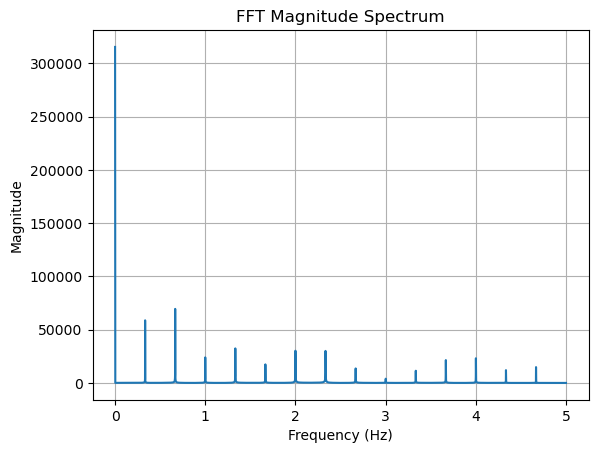

In [14]:
# Compute frequency bins
q= len(pow_seq)                      # Number of points in the signal
T = 1.0 / 10                     # Sampling interval (adjust based on your data)
freqs = np.fft.fftfreq(q, T)       # Frequency bins

plt.plot(freqs[:q // 2], np.abs(fft_result)[:q // 2])
plt.title("FFT Magnitude Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


In [ ]:
# pow_seq